# 따릉이 데이터 전처리

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime, timedelta

def set_num(txt):
    try: return int(str(txt).strip("'").lstrip("SPB-"))
    except : return 0

%matplotlib inline
pd.options.display.float_format = '{:.6g}'.format
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.size'] = 15

ws = "2015~2020_자전거 코드별 이용정보/"
directory = os.listdir(ws); directory

for i in range(len(directory)):
    print(i,':',directory[i])

0 : 서울특별시 공공자전거 대여이력_2015년.csv
1 : 서울특별시 공공자전거 대여이력_2016년_1.csv
2 : 서울특별시 공공자전거 대여이력_2016년_2.csv
3 : 서울특별시 공공자전거 대여이력_2016년_3.csv
4 : 서울특별시 공공자전거 대여이력_2017년_1.csv
5 : 서울특별시 공공자전거 대여이력_2017년_2분기_1.csv
6 : 서울특별시 공공자전거 대여이력_2017년_2분기_2.csv
7 : 서울특별시 공공자전거 대여이력_2017년_3분기_1.csv
8 : 서울특별시 공공자전거 대여이력_2017년_3분기_2.csv
9 : 서울특별시 공공자전거 대여이력_2017년_4분기_1.csv
10 : 서울특별시 공공자전거 대여이력_2017년_4분기_2.csv
11 : 서울특별시 공공자전거 대여이력_2018년_1분기_1.csv
12 : 서울특별시 공공자전거 대여이력_2018년_2분기_1.csv
13 : 서울특별시 공공자전거 대여이력_2018년_2분기_2.csv
14 : 서울특별시 공공자전거 대여이력_2018년_2분기_3.csv
15 : 서울특별시 공공자전거 대여이력_2018년_2분기_4.csv
16 : 서울특별시 공공자전거 대여정보_201808.csv
17 : 서울특별시 공공자전거 대여정보_201809_1.csv
18 : 서울특별시 공공자전거 대여정보_201809_2.csv
19 : 서울특별시 공공자전거 대여정보_201810_01.csv
20 : 서울특별시 공공자전거 대여정보_201810_02.csv
21 : 서울특별시 공공자전거 대여정보_201811.csv
22 : 서울특별시 공공자전거 대여정보_201812.csv
23 : 서울특별시 공공자전거 대여정보_201901.csv
24 : 서울특별시 공공자전거 대여정보_201902.csv
25 : 서울특별시 공공자전거 대여정보_201903.csv
26 : 서울특별시 공공자전거 대여정보_201904.csv
27 : 서울특별시 공공자전거 대여정보_201905.csv
28 : 서울특별시 공공자전거 대

[날짜계산](https://yuddomack.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-datetime-%EB%82%A0%EC%A7%9C-%EA%B3%84%EC%82%B0)

In [ ]:
for i in range(46):
    x = pd.read_csv(ws+directory[i],encoding='CP949')
    x = x.iloc[:,[0,5,2,6,9,10]]
    x.columns = x.columns = ['bike','date','start','end','time','dist']
    x['bike']=x['bike'].map(set_num)
    x['date']=x['date'].astype('datetime64[D]').map(lambda x : (x-datetime(2015, 9, 18)).days)

    x.to_csv(f"use/_Bike-Use{i}.csv", index=False)

In [164]:
y = pd.read_csv(ws+directory[46],encoding='CP949')
y = y.iloc[:,[0,5,2,6,9,10]]
y.columns = ['bike','date','start','end','time','dist']
y['bike']=y['bike'].map(set_num)
y['date']=y['date'].map(lambda x : (parse(x[:10])-datetime(2015, 9, 18)).days)

# 날짜 데이터 몇개가 깨져있는 것을 알게 됐다.

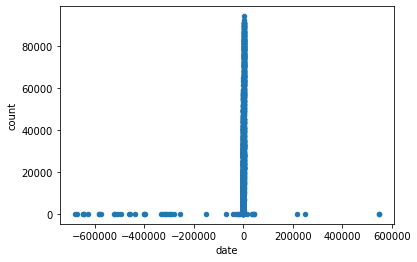

In [67]:
b.plot.scatter(x='date', y='count')

In [16]:
x = pd.DataFrame(columns = cols)
for i in range(len(directory)): 
    y = pd.read_csv(ws+directory[i],encoding='utf-8')
    is_date = 0 < min(y['date']) and max(y['date']) < 1920 # 2015.9.18 ~ 2020.12.20 날짜인지 검사
    if not is_date :
        print('#[date error]# :',directory[i])
    else : print(i,end=" ")
    x = pd.concat([x,y]) 
display(x)

# _Bike-Use46.csv
# _Bike-Use47.csv
# _Bike-Use48.csv
# _Bike-Use49.csv
# _Bike-Use50.csv

C:\Users\pwb1128\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_Bike-Use46.csv
_Bike-Use47.csv
_Bike-Use48.csv
_Bike-Use49.csv
_Bike-Use50.csv


,bike,date,start,end,time,dist
0,186,1,115,115,98,15240
1,403,1,112,102,286,10910
2,485,1,112,102,276,11000
3,292,1,221,221,63,16500
4,270,1,221,210,8,1870
...,...,...,...,...,...,...
1755041,14356,1748,1160,1160,119,18060
1755042,14454,1748,1235,1221,471,870
1755043,12680,1748,1346,1347,15,7230
1755044,32402,1748,1956,1956,919,39786.8


In [4]:
datetime(2020, 12, 20)-datetime(2015, 9, 18)

datetime.timedelta(days=1920)

In [11]:
is_date = 0 < min(y['date']) and max(y['date']) < 1920

True

In [46]:
def set_df(n) : 
    x = pd.read_csv(ws+directory[n],encoding='CP949')
    x = x.iloc[:,[0,5,2,6,9,10]]
    x.columns = x.columns = ['bike','date','start','end','time','dist']
    x['bike']=x['bike'].map(set_num)
    return x

y = set_df(47)
y['date']=y['date'].map(lambda x : (parse(x[:10])-datetime(2015, 9, 18)).days)
is_date_error = [False if 0 < days and days < 1920 else True for days in y['date']] 

pd.read_csv(ws+directory[47],encoding='CP949')[is_date_error]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
11750,SPB-07766,2020-02-01 13:33:02,1319,"종암사거리 분?測?,2""",2020-02-01 14:10:12,00583,청계천 생태교실 앞,4,36,6010,nan
35742,SPB-23097,2020-02-02 14:21:24,1840,"솔브레인이엔지 ?泯?,18""",2020-02-02 14:27:27,01830,빅마켓 금천점 앞,3,5,1250,nan
61682,SPB-16146,2020-02-03 15:13:19,1955,"디지털입구 교?湯?,2""",2020-02-03 15:17:46,02115,관악농협농산물백화점,5,4,0,nan
208689,SPB-07760,2020-02-10 02:34:17,2139,"서?節탉봤茄紵閨?,2""",2020-02-10 02:53:32,02136,신림역 8번출구,1,17,2810,nan
362287,SPB-05248,2020-02-14 23:05:49,907,"CJ 드림?쳤?,5""",2020-02-15 00:31:34,00931,역촌파출소,17,85,2280,nan
414156,SPB-07139,2020-02-18 08:18:14,1162,"공항?茄紵閨낡풍覺?,6""",2020-02-18 08:23:53,02701,마곡나루역 5번출구 뒤편,1,5,810,nan
525556,SPB-17539,2020-02-22 05:14:25,292,"영일 어린이공??,3""",2020-02-22 05:35:06,01960,화광신문사 앞,2,20,2110,nan
618632,SPB-02833,2020-02-26 03:24:45,641,"용두역 4번?瘦?,10""",2020-02-26 03:32:22,00633,청량리 기업은행 앞,1,7,830,nan
733682,SPB-19758,2020-02-29 23:21:38,1933,"개봉푸르지오아파트 ?箚?,1""",2020-02-29 23:34:35,00758,한사랑교회 앞,6,12,0,nan


In [100]:
def set_df2(n) :     
    x = pd.read_csv(ws+directory[n],encoding='CP949')
    nan = x.iloc[:,10].isnull()
    
    error = x[nan]
    y = x[~nan]
        
    y = y.iloc[:,[0,5,2,6,9,10]]
    y.columns = ['bike','date','start','end','time','dist']
    y['bike']=y['bike'].map(set_num)
    y['date']=y['date'].map(lambda x : (parse(x[:10])-datetime(2015, 9, 18)).days)
    
    is_date = [0 < date and date < 1920 for date in y['date']]
    if sum([not x for x in is_date]) != 0: 
        print(n)
        return y[is_date],  pd.concat([error, y[~is_date]])
    
    return y, error

In [101]:
for i in range(46,len(directory)):
    x,error = set_df2(i)
    
    x.to_csv(f"use/_Bike-Use{i}.csv", index=False)
    error.to_csv(f"use/_Bike-Use-error{i}.csv", index=False)

# 하나로 합치기

In [158]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime, timedelta

def set_Int(name):
    tp = type(name)
    if tp == int : return name
    elif tp == str :
        name = name.strip("'")
        try :
            name = int(name)
            return name
        except : 
            k = 0
            if name == '중랑센터' : k = 3
            elif name == '중랑정비팀test 1005' : k = 3
            elif name == '상암센터 정비실' :k = 5
            elif name == '위트콤공장' : k = 1
            elif name == '위트콤' :k = 1
            else : pass
            print(k, end="")
            return k
    
    elif np.isnan(name) : return name
    elif tp == float :  return int(name)
    else: print(type(name)); return name
    
ws = "use/"
directory = os.listdir(ws)
# print(*directory, sep="\n")

# 모두 정수형 데이터인지 확인

In [107]:
cols = ['bike', 'date', 'start', 'end', 'time', 'dist']
x = pd.DataFrame(columns = cols)
for i in range(len(directory)): 
    y = pd.read_csv(ws+directory[i],encoding='utf-8')
    is_date = 0 < min(y['date']) and max(y['date']) < 1920 # 2015.9.18 ~ 2020.12.20 날짜인지 검사
    if not is_date :
        print('#[date error]# :',directory[i])
    else : print(i,end=" ")
    x = pd.concat([x,y]) 
display(x)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 

,bike,date,start,end,time,dist
0,186,1,115,115,98,15240
1,403,1,112,102,286,10910
2,485,1,112,102,276,11000
3,292,1,221,221,63,16500
4,270,1,221,210,8,1870
...,...,...,...,...,...,...
1755041,14356,1748,1160,1160,119,18060
1755042,14454,1748,1235,1221,471,870
1755043,12680,1748,1346,1347,15,7230
1755044,32402,1748,1956,1956,919,39786.8


In [109]:
result = x
for col in cols :
    print(col, sum([type(x) != int for x in result[col]]))

bike 0
date 3145725
start 13377238
end 13377238
time 10403754
dist 31131628


In [196]:
result = result.dropna() # nan 붙어있는 데이터 삭제

In [155]:
result['date'] = result['date'].map(set_Int)

C:\Users\pwb1128\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
result['start'] = result['start'].map(set_Int)

C:\Users\pwb1128\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
result['end'] = result['end'].map(set_Int)

C:\Users\pwb1128\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
result['time'] = result['time'].map(set_Int)

C:\Users\pwb1128\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
result['dist'] = result['dist'].map(set_Int)

In [137]:
start_log = '5555555555553333355555555553355555555555555555555555555535555533353333555555555555555555555555555555555555555555555555555555555555555555555555555555555553555555555555555555555555555555555555553555555555355553335353333333353353335535555555335535533333335555533335555535333355553335533513533111111111155333335133353131315335111113313333135151111111311113331155555333111133331311111111111111111111111111531131111111133111111333331131313333351133133113133311111111111555311311333335331111333333333333333333331533313333331133131331333533333331111111111113333311313133333333331131113311113313333333333333533333333333333333333333313333333113333311115133133333333333333333331311111153111555515111111135533511111355115535551331555555131111153511111115111111111111113355555555555535553553115311113331111111111111111111115151111111111111111111111111111555331111111111111111111111111111153311115333333355333533333535333333333333333533135333111111113113311113111333311111111113333113333133333355333335333335355333333111111111111111131111131111111133111111113311135113133333331333333353333111133333313311331133333333333333333333335333333333333333333333333333333333333333333333333333333333333333333333333533333335333353333333333333333111333333353333333333333333333353333333333333333333333555333333335355535555553333333333333333333555533553333353335333333333333533333333333333333353333333333333333333333333333333333333333335335333333333353333333353333533333555333553333335333335333333533353333333335333533333333333355533553333333333333333333333333333535535333333333333335333333333333335533533333333353335533333'
end_log = '55555555555553335533555555555533555555555555555555555555555553555555333333355555555555555555555555555555555555555555555555555555555555555555555555555555555555535555555555555555555555555555555555555535555555555553555555333553533333335553353555553555535335553555555555555533555555555355553355335553335555555555553353553555553555553333555553335555555533513533111111111115533333513335313315335115111331533331351531111113111155553331155555535331111333313511111155511111111111111111111531111133113111353311111133333331131313333351313111313333111111111115555113113335111133333333333333333333331353331333333333311311153533533353311111111111133333313113133333333333533311333111311113331333333333335333333333333333333333333333335313335333331133333333333111113333333331333333333333333333333331511111153155115555551555111111135553355111113555115555355513355155555513311115355151111115511111111111111333355555555555555535535355311533111135151111111111111131111115151111111111111111111111111135115555555555333131111111111511111111111111111155331111533333553553533553535533515311111113151133111111135311111111115331133335513335555333555333355533311111111111111111111131111111133511111111351113553113133333353133335333331111133313113311353333333333533333333333353333333333333333333333333333353333333333333333333333333333333533333333333333335333533333333333333111333533333333333333333335333333333333333333333355533333353555355555533333333333333333335555533335533333533533333533333333335333333333333333335333333333333333333333333333333333333333333335535333333333333333353333333333533333333335553333355333535333333353333533333333533353333333533333555333333335533333333333533333333333333333333333333333333335533533333333353333333333553333333333333355353355355333333353333533333333553333333'

dicA = {}
for s in start_log :
    if s in dicA.keys(): dicA[s] += 1
    else: dicA[s] = 1

dicB = {}
for s in end_log :
    if s in dicB.keys(): dicB[s] += 1
    else: dicB[s] = 1

print(dicA)
print(dicB)

# (1) 위트콤공장  
# (3) 중랑정비팀test 1005'   
# (5) 상암센터 정비실  

{'5': 374, '3': 836, '1': 384}
{'5': 522, '3': 864, '1': 383}


데이터에 nan 값이 있으면 folat 타입으로 변환된다. 
bike : 0  
date : 3145725  (floa)  
start : 13377238 (와트콤 384, 중량 836, 상암 374)  
end  : 13377238 (와트콤 384, 중량 864, 상암 522)  
time : 10403754 (str)  
dist : 31131628 (str, flot)  

In [198]:
print(col, sum([type(x) != int for x in result['dist']]))

dist 0


In [156]:
for col in cols :
    print(col, sum([type(x) != int for x in result[col]]))

bike 0
date 0
start 0
end 0
time 0
dist 0


In [159]:
result

,bike,date,start,end,time,dist
0,186,1,115,115,98,15240
1,403,1,112,102,286,10910
2,485,1,112,102,276,11000
3,292,1,221,221,63,16500
4,270,1,221,210,8,1870
...,...,...,...,...,...,...
1755041,14356,1748,1160,1160,119,18060
1755042,14454,1748,1235,1221,471,870
1755043,12680,1748,1346,1347,15,7230
1755044,32402,1748,1956,1956,919,39786


# 에러 복원값과 합치기

In [181]:
fixed = pd.read_csv('./_Bike-Use-errors-fixed.csv',encoding='CP949') ; fixed

,자전거,반납시간,대여대여소,반답대여소,시간,이동거리
0,SPB-09846,2020-01-03 6:56,1162,2701,4,830
1,SPB-02297,2020-01-03 18:00,1428,1428,23,0
2,SPB-16990,2020-01-03 18:21,1986,1916,10,1570
3,SPB-12017,2020-01-04 11:41,3509,3518,3,760
4,SPB-07700,2020-01-10 17:56,1984,2135,30,5360
...,...,...,...,...,...,...
114,SPB-11397,2020-05-23 14:54,1438,1441,12,1680
115,SPB-22925,2020-05-25 20:49,1162,1162,115,13120
116,SPB-22403,2020-05-27 20:19,1841,2177,15,2390
117,SPB-32384,2020-05-28 7:34,1162,1106,56,0


In [182]:
y = fixed
y.columns = ['bike','date','start','end','time','dist']
y['bike']=y['bike'].map(set_num)
y['date']=y['date'].map(lambda x : (parse(x[:10])-datetime(2015, 9, 18)).days)
fixed = y

In [189]:
# result = pd.concat([result,y])
result = result.sort_values(by='date')

In [199]:
result.to_csv(f"Bike-Use-final.csv", index=False)

# 사용량 그래프 그리기

In [191]:
a = result.date.value_counts()

In [192]:
b = pd.DataFrame({'date' : a.index, 'count' : a.values})
b

,date,count
0,1686,94067
1,1390,92191
2,1477,91263
3,1384,91079
4,1690,91007
...,...,...
1714,50,62
1715,15,47
1716,657,9
1717,1018,1


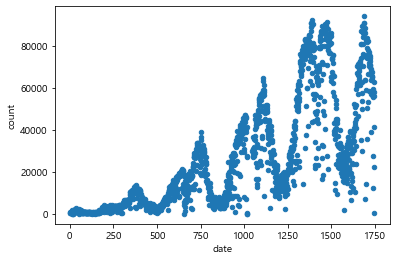

In [193]:
b.plot.scatter(x='date', y='count')